### 1. Importing libraries, the second two relate to the heatmap- the final is what's called a 'magic' and tells Jupyter to display the images in place, rather than just saving them somewhere

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

### 2. This file was pretty standard so didn't require any particular parameters to pass to the read_csv function

In [23]:
df= pd.read_csv('C:/Users/rtfly/Documents/HDip/Web_DataMining/HR_comma_sep.csv')
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### 3. The .unique() method will return all unique values for a given variable, 'sales' in this case

In [24]:
df.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### 4. Creating a dictionary will allow you to map values in order to replace string data with integers, remembering that there are a few ML algorithms that won't accept strings.

In [25]:
sales_dict = {'sales':1, 
              'accounting':2, 
              'hr':3, 
              'technical':4, 
              'support':5, 
              'management':6, 
              'IT':7, 
              'product_mng':8,
              'marketing':9,
              'RandD':10
              }

### 5. The .replace() function is a really flexible mapping tool, and can accept a dictionary as a parameter- the 'inplace=True' ensures that the changes affect the dataframe you're using. If you made this command without that, it would just show you what the df would look like with the changes, but the original one will remain the same. It would be the same as df = df.replace(x, y) but is more efficient in that it doesn't write a whole new dataframe.

In [26]:
df.replace({"sales": sales_dict}, inplace=True)

In [27]:
df.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [28]:
salary_dict = {'low':1,
               'medium':2,
               'high':3
               }

In [29]:
df.replace({"salary": salary_dict}, inplace=True)

### 6. This is just a summary function, but will throw NaN for any variables that have missing values, so it's a good way to test for those. I'm happy to say, our data is CLEAN!

In [16]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,4.339823,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,7.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


### 7. Now, the heat map. It's just a few lines of code once the data is clean. Did not drop 'left' at this stage, no harm in giving ourselves a clue as to what to go for. Nothing much else anyway. But it's negatively correlated to satisfaction level, meaning that that's a major driver. So even if you're being headhunted and are some kinda tech wizard, you might still stay if you're happy. I guess we need to find out what makes staff dissatisfied in the first place!

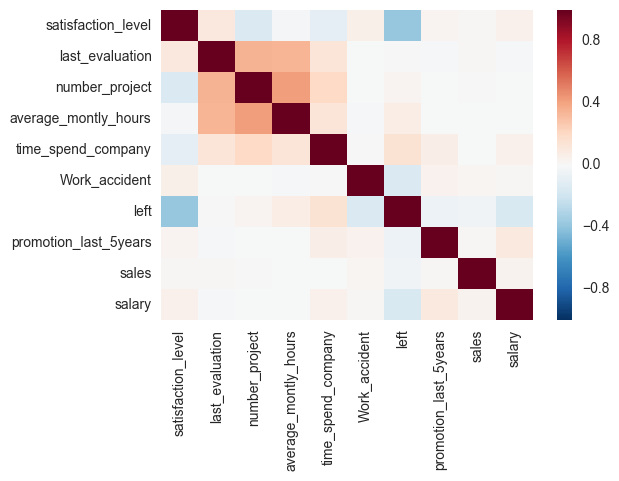

In [30]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 8. This is pretty self-explanatory, dropping the target variable 'left' from the original df, again the inplace parameter is set to True, otherwise it won't stick.

In [31]:
df.drop('left', axis=1, inplace=True)

### 9. The final df. Can't fit the whole thing but it's more to see the replaced values and the lack of 'left' variable column!

In [32]:
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,1,1
1,0.80,0.86,5,262,6,0,0,1,2
2,0.11,0.88,7,272,4,0,0,1,2
3,0.72,0.87,5,223,5,0,0,1,1
4,0.37,0.52,2,159,3,0,0,1,1
5,0.41,0.50,2,153,3,0,0,1,1
6,0.10,0.77,6,247,4,0,0,1,1
7,0.92,0.85,5,259,5,0,0,1,1
8,0.89,1.00,5,224,5,0,0,1,1
9,0.42,0.53,2,142,3,0,0,1,1
